Covid graph condensed
==

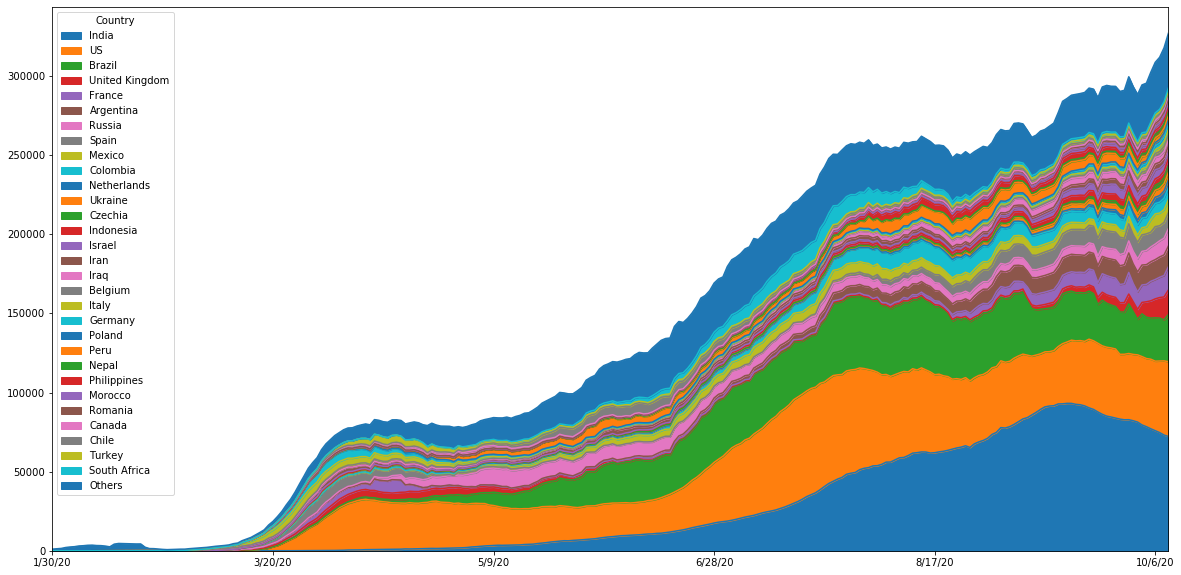

In [11]:
k = 30
import pandas as pd
confirmed=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_agg = confirmed.groupby('Country/Region').sum()
dates_list = confirmed_agg.columns[3:]
current_date = dates_list[-1]
new_cases_data = confirmed_agg[dates_list].diff(axis = 1, periods = 7)
new_cases_data = new_cases_data[new_cases_data.columns[7:]]/7 #remove NaN
new_cases_data = new_cases_data.sort_values(current_date,ascending = False).reset_index().reset_index()
new_cases_data.loc[new_cases_data['index']<k, 'Country'] = new_cases_data['Country/Region']
new_cases_data.loc[new_cases_data['index']>=k, 'Country'] = 'Others'
new_cases_data = new_cases_data.groupby('Country').sum().sort_values('index', ascending = True)
new_cases_data = new_cases_data[new_cases_data.columns[1:]]
new_cases_data.transpose().plot.area(stacked=True,figsize=(20,10))

In [2]:
import pandas as pd
confirmed=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dates_list = confirmed.columns[4:]
col1 = confirmed.columns[:4]
confirmed['diff'] = confirmed[confirmed.columns[-1]] - confirmed[confirmed.columns[-2]]
new_cases_dim1 = confirmed[col1]
new_cases_dim2 = confirmed['diff']
new_cases_dim = pd.concat([new_cases_dim1,new_cases_dim2], axis=1, sort=False)
#new_cases_dim.rename(columns={confirmed.columns[-1]:'max_date'}, inplace=True)
new_cases_dim = new_cases_dim.sort_values(by = 'diff', ascending = False)
new_cases_data = confirmed[dates_list].diff(axis = 1, periods = 7)
new_cases_data = new_cases_data[new_cases_data.columns[8:]]/7 #remove NaN
new_cases = pd.concat([new_cases_dim, new_cases_data], axis=1, sort=False)
new_cases_normalized=new_cases.melt(id_vars=['Province/State','Country/Region','Lat','Long','diff'],var_name='date',value_name='new_cases')

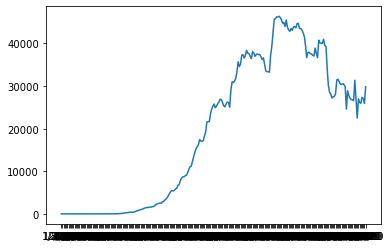

In [10]:
from matplotlib import pyplot as plt
raw_exact = new_cases_normalized[new_cases_normalized['Country/Region']=='Brazil']
plt.plot(raw_exact['date'],raw_exact['new_cases'])
plt.show()

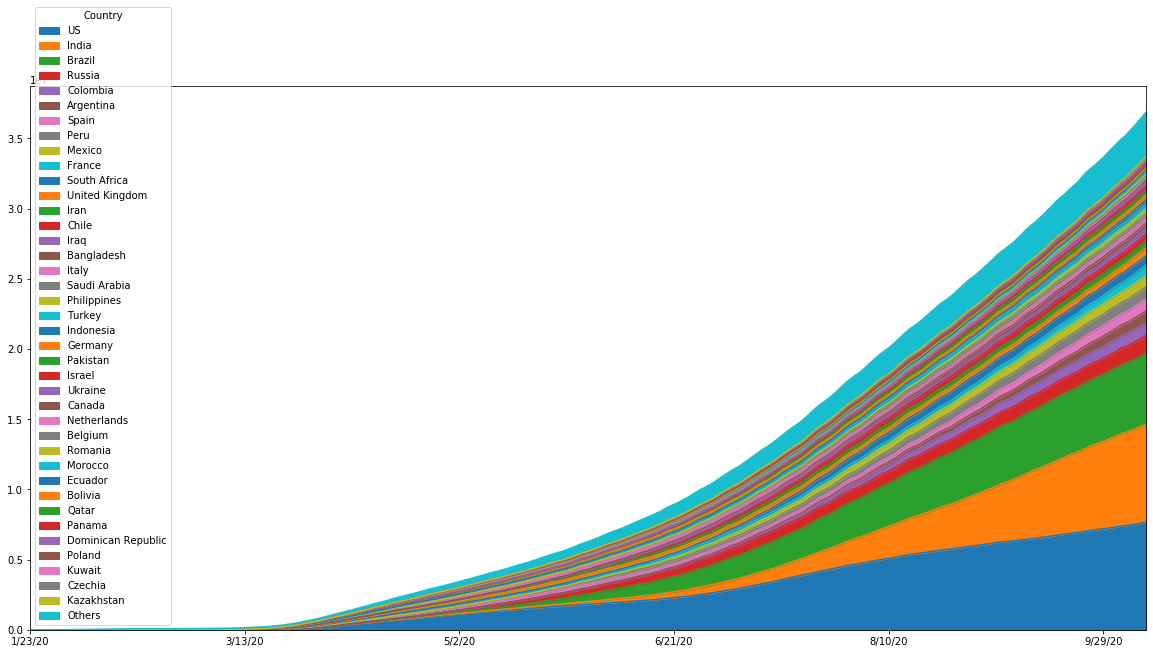

In [4]:
k = 39
import pandas as pd
confirmed=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_agg = confirmed.groupby('Country/Region').sum()
dates_list = confirmed_agg.columns[3:]
current_date = dates_list[-1]
new_cases_data = confirmed_agg[dates_list]
new_cases_data = new_cases_data.sort_values(current_date,ascending = False).reset_index().reset_index()
new_cases_data.loc[new_cases_data['index']<k, 'Country'] = new_cases_data['Country/Region']
new_cases_data.loc[new_cases_data['index']>=k, 'Country'] = 'Others'
new_cases_data = new_cases_data.groupby('Country').sum().sort_values('index')
new_cases_data = new_cases_data[new_cases_data.columns[1:]]
new_cases_data.transpose().plot.area(stacked=True,figsize=(20,10))

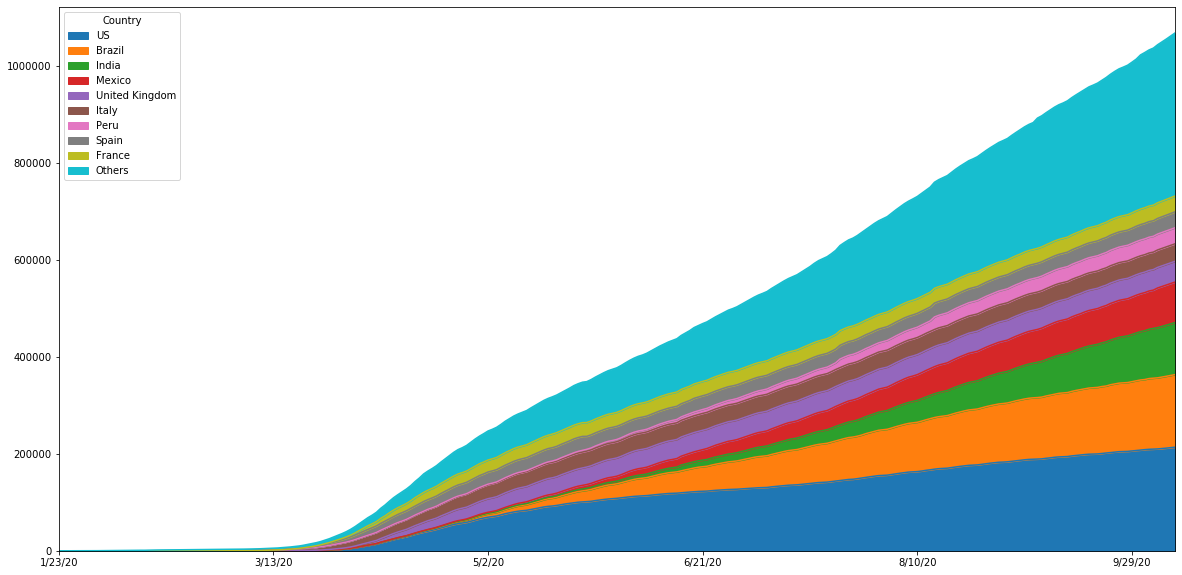

In [5]:
k = 9
import pandas as pd
confirmed=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_agg = confirmed.groupby('Country/Region').sum()
dates_list = confirmed_agg.columns[3:]
current_date = dates_list[-1]
new_cases_data = confirmed_agg[dates_list]
new_cases_data = new_cases_data.sort_values(current_date,ascending = False).reset_index().reset_index()
new_cases_data.loc[new_cases_data['index']<k, 'Country'] = new_cases_data['Country/Region']
new_cases_data.loc[new_cases_data['index']>=k, 'Country'] = 'Others'
new_cases_data = new_cases_data.groupby('Country').sum().sort_values('index')
new_cases_data = new_cases_data[new_cases_data.columns[1:]]
new_cases_data.transpose().plot.area(stacked=True,figsize=(20,10))